In [1]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt

df = pd.read_csv('CSV_EXCEL\\atherosclerosis.csv')
aov = pg.anova(dv='expr', between=['age', 'dose'], data=df)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,age,197.452754,1,197.452754,7.449841,0.008313,0.110450
1,dose,16.912241,1,16.912241,0.638094,0.427552,0.010523
2,age * dose,0.927077,1,0.927077,0.034978,0.852272,0.000583
3,Residual,1590.257424,60,26.504290,NaN,NaN,NaN


In [2]:
# рассчитываем средние
means = df.groupby(by=['age', 'dose']).mean().expr.values
means

array([104.75846408, 105.5458643 , 101.00480487, 102.27362937])

In [3]:
# рассчитываем доверительные интервалы
sems = [x*1.96 for x in df.groupby(by=['age', 'dose']).sem().expr.values]
sems

[2.8730922253165603, 2.140821827749047, 2.5069920683182922, 2.5163334893981406]

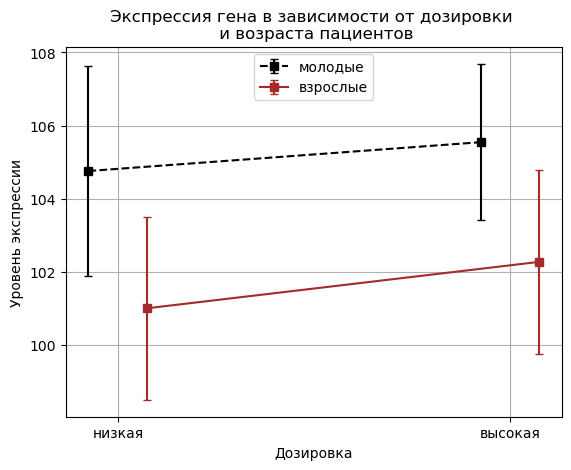

In [4]:
# строим график
fig, ax = plt.subplots()
ax.set_xticks([2.25, 4.25])
ax.set_xticklabels(['низкая', 'высокая'])
ax.errorbar(x=[2.1, 4.1], y=means[:2], yerr=sems[:2], capsize=3,
            marker='s', color='black', linestyle='--')
ax.errorbar(x=[2.4, 4.4], y=means[2:], yerr=sems[2:],
            capsize=3, marker='s', color='brown')
ax.set_title('Экспрессия гена в зависимости от дозировки \n и возраста пациентов')
ax.grid()
ax.set_xlabel('Дозировка')
ax.set_ylabel('Уровень экспрессии')
ax.legend(['молодые', 'взрослые'], loc='upper center')
plt.show()